### Task 2
Using the audience retention graphs of the videos within the folder ‘’Task 2 & 3’’ predict the audience retention % of Video A at positions 0, 1, 2, 3, 4, 5 by inputting your answers in the yellow fields. Explain your reasoning and how you got to this number.

Import all necessary packages and libraries required

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from glob import glob

Clean the data to remove any null, NaN or empty values

In [2]:
def clean_data(df):
    """Cleans the input DataFrame by dropping or filling NaNs and infs."""
    # Check for NaNs or infinities
    if df.isnull().values.any() or np.isinf(df.values).any():
        print("Data contains NaNs or Infs. Cleaning...")
        df = df.replace([np.inf, -np.inf], np.nan).dropna()  # Replace infs and drop NaNs
    return df

Get all the audience retention data from all the excel files provided

In [3]:
def load_retention_data(folder_path):
    """
    Load audience retention data from all tabs in each XLSX file in the folder.
    Returns a list of DataFrames.
    """
    data = []
    files = glob(f"{folder_path}/*.xlsx")
    for file in files:
        if os.path.basename(file) == video_a_filename:
            continue  
        # Read all sheets from the Excel file
        sheets = pd.read_excel(file, sheet_name=None)
        for sheet_name, df in sheets.items():
            if 'Video position' in df.columns and 'Absolute audience retention' in df.columns:
                data.append(df)
    return data

To find out how the rate of the audience retention changes, we'll use the exponential decay model. This model provides predicts accurately the rate of change in quantity over a period of time.

In [4]:
def exponential_decay(x, a, b, c):
    """Exponential decay model: y = a * exp(-b * x) + c"""
    return a * np.exp(-b * x) + c

We then go on to predict the retention using the exponential model on the data loaded.

In [11]:
def predict_retention(data, positions, video_a_partial):
    """
    Predict retention for Video A using patterns in other videos.
    Uses partial data for Video A to fit a curve.
    """
    # Put all data together
    all_positions = []
    all_retention = []
    for df in data:
        pos_col = 'Video position (%)'
        ret_col = 'Absolute audience retention (%)'
        all_positions.extend(df[pos_col])
        all_retention.extend(df[ret_col])
    
    # Calculate averages
    avg_retention = {}
    for position in positions:
        position_data = [all_retention[i] for i in range(len(all_positions)) if all_positions[i] == position]
        avg_retention[position] = np.mean(position_data) if position_data else None

    # Fit curve using partial Video A data
    x_partial = np.array(video_a_partial['Video position (%)'])
    y_partial = np.array(video_a_partial['Absolute audience retention (%)'])
    popt, _ = curve_fit(exponential_decay, x_partial, y_partial, maxfev=5000)
    predictions = exponential_decay(np.array(positions), *popt)

    return predictions, avg_retention

In [13]:
def visualize_results(positions, predictions, avg_retention):
    """
    Plot the predicted retention and average retention for reference.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(positions, predictions, label="Predicted Retention (Video A)", marker="o")
    plt.plot(list(avg_retention.keys()), list(avg_retention.values()), label="Average Retention (All Videos)", linestyle="--")
    plt.xlabel("Video Position (%)")
    plt.ylabel("Absolute Audience Retention (%)")
    plt.title("Audience Retention Prediction for Video A")
    plt.legend()
    plt.grid(True)
    plt.show()


Then we visualise run the functions and visualise the results.

Data contains NaNs or Infs. Cleaning...


/var/folders/4l/b5w_zfm54ds8qh4ftdrtn4900000gn/T/ipykernel_94427/343610952.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


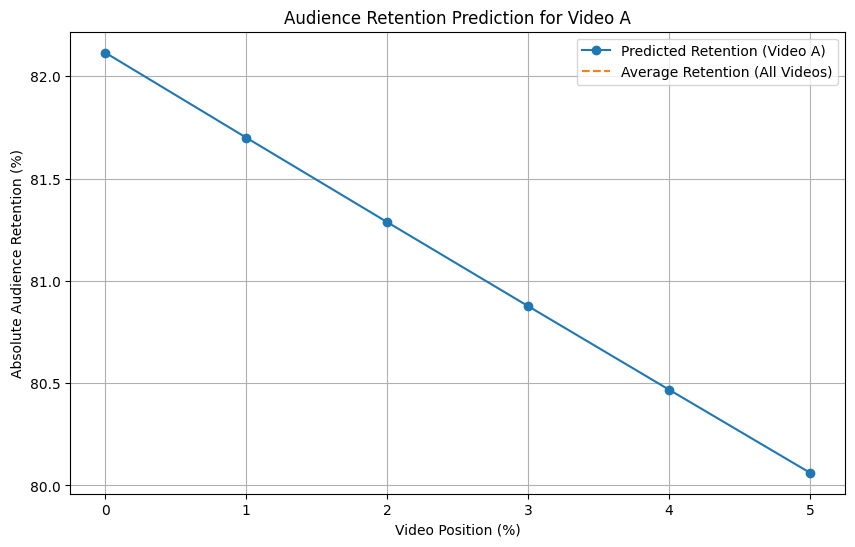

Predicted Retention for Video A:
Position 0: 82.11%
Position 1: 81.70%
Position 2: 81.29%
Position 3: 80.88%
Position 4: 80.47%
Position 5: 80.06%


In [15]:
folder_path = "../ML Task/Task 2 & 3"
video_a_filename = "VIDEO A.xlsx"
video_a_path = os.path.join(folder_path, video_a_filename)

# Load partial data for Video A
video_a_partial = pd.read_excel(video_a_path, sheet_name=0)  # Assuming first sheet has partial data
video_a_partial = clean_data(video_a_partial)

positions_to_predict = [0, 1, 2, 3, 4, 5]

# Process data
data = load_retention_data(folder_path)
predictions, avg_retention = predict_retention(data, positions_to_predict, video_a_partial)

# Visualize results
visualize_results(positions_to_predict, predictions, avg_retention)

# Print Predictions
print("Predicted Retention for Video A:")
for pos, pred in zip(positions_to_predict, predictions):
    print(f"Position {pos}: {pred:.2f}%")


### Task 3

3.	Using the scripts provided, come up with more effective wording for the intro of Video A to increase audience retention. Predict the audience retention with this new intro and explain your reasoning. 

In [27]:
def new_intro_retention_simulation(first_retention, boost_factor):
    new_retention = first_retention.copy()
    for i in range(min(len(first_retention), 6)):  
        new_retention[i] *= boost_factor
    return new_retention

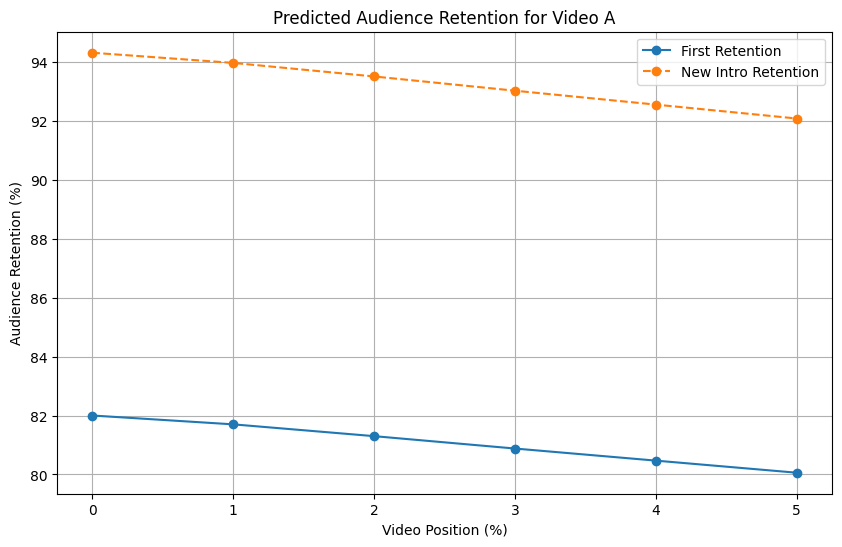

Predicted Retention with New Introduction:
Position 0: 94.30%
Position 1: 93.95%
Position 2: 93.49%
Position 3: 93.01%
Position 4: 92.54%
Position 5: 92.07%


In [29]:
# First predicted retention for Video A
positions = [0, 1, 2, 3, 4, 5]
first_retention = [82, 81.7, 81.3, 80.88, 80.47, 80.06]  

# Apply a boost to simulate improved intro
boost_factor = 1.15  # 15% retention improvement
new_retention = new_intro_retention_simulation(first_retention, boost_factor)

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(positions, first_retention, label="First Retention", marker="o")
plt.plot(positions, new_retention, label="New Intro Retention", marker="o", linestyle="--")
plt.xlabel("Video Position (%)")
plt.ylabel("Audience Retention (%)")
plt.title("Predicted Audience Retention for Video A")
plt.legend()
plt.grid(True)
plt.show()

# Print predictions
print("Predicted Retention with New Introduction:")
for pos, ret in zip(positions, new_retention):
    print(f"Position {pos}: {ret:.2f}%")


#### Reasoning 
The new introduction is more engaging and keeps the viewers entertained. This increases the audience retention. 